In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
df = pd.read_csv("data/CleanedJobPostings.csv")
df.head()


,title,company_profile,location,salary_range,employment_type,industry,benefits,requirements,description,fraudulent,text
0,mental health nurse,rivera and sons - established 2022.,west jeffrey,$55016-$100476,internship,it,free meals,"basic knowledge in live, no degree required. f...",arm drive court sure vote. earn $5000/week! im...,1,mental health nurse rivera and sons - establis...
1,conference centre manager,"davidson, jones and gomez - established 2003.",lake meredithberg,$53438-$93138,part-time,finance,flexible hours,"basic knowledge in seek, no degree required. f...",government whom its bed go tax tree black. ear...,1,"conference centre manager davidson, jones and ..."
2,"engineer, land",allen ltd - established 1998.,lake cathybury,$45584-$105229,part-time,it,free travel,"basic knowledge in worker, no degree required....",i member discuss follow way there nation. earn...,1,"engineer, land allen ltd - established 1998. i..."
3,forest/woodland manager,forbes ltd - established 1990.,south matthewstad,$66188-$139621,full-time,education,free travel,"basic knowledge in example, no degree required...",house across wait approach face. earn $5000/we...,1,forest/woodland manager forbes ltd - establish...
4,"production designer, theatre/television/film","jennings, martin and sanchez - established 1975.",east rhondafurt,$32183-$115012,temporary,retail,flexible hours,"basic knowledge in smile, no degree required. ...",case best environmental full finally leader me...,1,"production designer, theatre/television/film j..."


In [131]:
df["text"][0]


'mental health nurse rivera and sons - established 2022. arm drive court sure vote. earn $5000/week! immediate hiring. contact now at david27@gmail.com. basic knowledge in live, no degree required. flexible hours. free meals'

In [132]:
#no need for the columns that are already in the "text" column, lets drop from the dataframe before moving forward
cols_in_text = ["title", "company_profile", "description", "requirements", "benefits"]

df = df.drop(columns = cols_in_text)

In [133]:
df.shape

(25556, 6)

In [134]:
df.isnull().sum()

location           0
salary_range       0
employment_type    0
industry           0
fraudulent         0
text               0
dtype: int64

Before starting feature engineering, I will split the data into training and testing datasets to ensure no leakage occurs when I use TF-IDF or scale the features.

In [135]:
X = df.drop(columns=["fraudulent"])
y = df["fraudulent"]

y.value_counts()

fraudulent
0    14870
1    10686
Name: count, dtype: int64

There is no class imbalance between fradulent and non-fradulent postings here
for reference, fradulent = 1

In [136]:
#just double checking that this aligns with original data

path1 = "data/FakePostings.csv"
path2 = "data/RealAndFake.csv"

# Load datasets
df_fake = pd.read_csv(path1)
df_rf = pd.read_csv(path2)

print(df_fake["fraudulent"].value_counts())
print(df_rf["fraudulent"].value_counts())


fraudulent
1    10000
Name: count, dtype: int64
fraudulent
0    17014
1      866
Name: count, dtype: int64


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17889, 5)
(7667, 5)
(17889,)
(7667,)


To start the process of feature engineering, I will manipulate X_train first and then apply the same manipulations on X_test later. 

In [138]:
#Will use tf-idf vectorization to convert "text" into numerical values

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english',
    min_df = 5
)

#fit on training only
tfidf.fit(X_train["text"])

#transform testing and training
X_train_tfidf = tfidf.transform(X_train["text"])
X_test_tfidf = tfidf.transform(X_test["text"])


In [139]:
print(X_train_tfidf)

  (0, 4836)	0.09682929563322117
  (0, 4835)	0.09067196515604752
  (0, 3787)	0.09682216612162611
  (0, 3785)	0.0767191529298467
  (0, 3070)	0.19844678212437014
  (0, 2969)	0.2540928861939725
  (0, 2911)	0.22644275930809013
  (0, 2775)	0.30551058525625235
  (0, 2580)	0.2390500271191429
  (0, 2579)	0.23807906788306296
  (0, 2511)	0.1723736601468794
  (0, 2509)	0.0729407003464108
  (0, 2321)	0.2444820265473422
  (0, 2320)	0.23071570852655837
  (0, 2291)	0.192842248800243
  (0, 2254)	0.09682216612162611
  (0, 2253)	0.09454369112007363
  (0, 2202)	0.17768507136403455
  (0, 2200)	0.17206714705603426
  (0, 2168)	0.09682929563322117
  (0, 2167)	0.09042044133853472
  (0, 1871)	0.19162594332575716
  (0, 1870)	0.17480464601510773
  (0, 1623)	0.29547648268798626
  (0, 1602)	0.08843445289372476
  :	:
  (17888, 836)	0.049233661222911285
  (17888, 830)	0.06615798484027123
  (17888, 793)	0.05790450893183026
  (17888, 717)	0.04356222130105123
  (17888, 715)	0.09511636996289173
  (17888, 641)	0.068484060

Now I will one-hot-encode categorical values 

In [140]:
X_train.dtypes

location           object
salary_range       object
employment_type    object
industry           object
text               object
dtype: object

In [141]:
X_train.head()

,location,salary_range,employment_type,industry,text
8343,lowehaven,$68357-$117042,internship,finance,"conservation officer, nature morales, gibson a..."
10413,"us, ct, stamford",unknown,full-time,consumer services,customer service technical specialist novitex ...
7954,christinemouth,$51428-$124721,internship,finance,minerals surveyor fox-young - established 1986...
14811,"us, mi, buchanan",unknown,part-time,hospital & health care,"caregiver - buchanan/niles ""our mission to our..."
5201,davisfort,$66069-$143385,internship,telecommunications,"scientist, water quality phillips ltd - establ..."


In [142]:
print(X_train["industry"].value_counts)
print("====================================")
print(X_train["industry"].nunique())

<bound method IndexOpsMixin.value_counts of 8343                       finance
10413            consumer services
7954                       finance
14811       hospital & health care
5201            telecommunications
                   ...            
21468           gambling & casinos
11802    marketing and advertising
5481                        retail
2133                   real estate
14821    marketing and advertising
Name: industry, Length: 17889, dtype: object>
134


In [143]:
unique_industries = sorted(pd.concat([X_train["industry"], X_test["industry"]]).dropna().unique())
print(unique_industries)
print(len(unique_industries))


['accounting', 'airlines/aviation', 'alternative dispute resolution', 'animation', 'apparel & fashion', 'architecture & planning', 'automotive', 'aviation & aerospace', 'banking', 'biotechnology', 'broadcast media', 'building materials', 'business supplies and equipment', 'capital markets', 'chemicals', 'civic & social organization', 'civil engineering', 'commercial real estate', 'computer & network security', 'computer games', 'computer hardware', 'computer networking', 'computer software', 'construction', 'consumer electronics', 'consumer goods', 'consumer services', 'cosmetics', 'defense & space', 'design', 'e-learning', 'education', 'education management', 'electrical/electronic manufacturing', 'entertainment', 'environmental services', 'events services', 'executive office', 'facilities services', 'farming', 'finance', 'financial services', 'fishery', 'food & beverages', 'food production', 'fund-raising', 'furniture', 'gambling & casinos', 'government administration', 'government r

['accounting', 'airlines/aviation', 'alternative dispute resolution', 'animation', 'apparel & fashion', 'architecture & planning', 'automotive', 'aviation & aerospace', 'banking', 'biotechnology', 'broadcast media', 'building materials', 'business supplies and equipment', 'capital markets', 'chemicals', 'civic & social organization', 'civil engineering', 'commercial real estate', 'computer & network security', 'computer games', 'computer hardware', 'computer networking', 'computer software', 'construction', 'consumer electronics', 'consumer goods', 'consumer services', 'cosmetics', 'defense & space', 'design', 'e-learning', 'education', 'education management', 'electrical/electronic manufacturing', 'entertainment', 'environmental services', 'events services', 'executive office', 'facilities services', 'farming', 'finance', 'financial services', 'fishery', 'food & beverages', 'food production', 'fund-raising', 'furniture', 'gambling & casinos', 'government administration', 'government relations', 'graphic design', 'health, wellness and fitness', 'healthcare', 'higher education', 'hospital & health care', 'hospitality', 'human resources', 'import and export', 'individual & family services', 'industrial automation', 'information services', 'information technology and services', 'insurance', 'international trade and development', 'internet', 'investment banking', 'investment management', 'it', 'law enforcement', 'law practice', 'legal services', 'leisure, travel & tourism', 'libraries', 'logistics and supply chain', 'luxury goods & jewelry', 'machinery', 'management consulting', 'maritime', 'market research', 'marketing and advertising', 'mechanical or industrial engineering', 'media production', 'medical devices', 'medical practice', 'mental health care', 'military', 'mining & metals', 'motion pictures and film', 'museums and institutions', 'music', 'nanotechnology', 'nonprofit organization management', 'oil & energy', 'online media', 'outsourcing/offshoring', 'package/freight delivery', 'packaging and containers', 'performing arts', 'pharmaceuticals', 'philanthropy', 'photography', 'plastics', 'primary/secondary education', 'printing', 'professional training & coaching', 'program development', 'public policy', 'public relations and communications', 'public safety', 'publishing', 'ranching', 'real estate', 'religious institutions', 'renewables & environment', 'research', 'restaurants', 'retail', 'security and investigations', 'semiconductors', 'shipbuilding', 'sporting goods', 'sports', 'staffing and recruiting', 'telecommunications', 'textiles', 'translation and localization', 'transportation/trucking/railroad', 'unknown', 'utilities', 'venture capital & private equity', 'veterinary', 'warehousing', 'wholesale', 'wine and spirits', 'wireless', 'writing and editing']
136


In [144]:
other_industries = []
def group_industry(ind):

    if pd.isna(ind) or ind.lower() == "unknown":
        return "Other"
    
    ind_lower = ind.lower()
    
    # --- Finance ---
    if any(k in ind_lower for k in [
        "finance", "financial", "bank", "capital", "investment", "insurance",
        "venture", "private equity", "accounting", "international trade and development"
    ]):
        return "Finance"

    # --- Healthcare ---
    if any(k in ind_lower for k in [
        "health", "medical", "hospital", "biotech", "pharma", "pharmaceutical",
        "healthcare", "mental", "veterinary", "individual & family services"
    ]):
        return "Healthcare"

    # --- Technology ---
    if any(k in ind_lower for k in [
        "computer", "it", "software", "hardware", "internet", "online",
        "network", "data", "semiconductor", "nanotech",
        "telecommunications", "wireless", "information services",
        "information technology and services"
    ]):
        return "Technology"

    # --- Education ---
    if any(k in ind_lower for k in [
        "education", "e-learning", "higher education", "primary/secondary",
        "libraries"
    ]):
        return "Education"

    # --- Government / Nonprofit ---
    if any(k in ind_lower for k in [
        "government", "public policy", "public safety", "nonprofit", "law enforcement",
        "executive office", "philanthropy", "government relations", "fund-raising"
    ]):
        return "Government/Nonprofit"

    # --- Retail / Hospitality ---
    if any(k in ind_lower for k in [
        "retail", "restaurant", "food", "beverages", "hospitality", "apparel",
        "luxury", "consumer", "fashion", "travel", "tourism", "leisure, travel & tourism",
        "automotive", "cosmetics", "entertainment", "gambling & casinos",
        "music", "performing arts", "sporting goods", "sports", "wholesale"
    ]):
        return "Retail/Hospitality"

    # --- Engineering / Construction ---
    if any(k in ind_lower for k in [
        "construction", "architecture", "civil", "real estate",
        "building", "commercial real estate"
    ]):
        return "Engineering/Construction"

    # --- Manufacturing / Industrial / Energy ---
    if any(k in ind_lower for k in [
        "manufacturing", "industrial", "machinery", "mechanical", "automation",
        "aerospace", "defense", "chemicals", "oil", "energy", "mining", "metals",
        "utilities", "packaging", "plastics", "ranching", "farming", "fishery",
        "renewables & environment", "printing", "textiles"
    ]):
        return "Manufacturing/Industrial"

    # --- Transportation / Logistics ---
    if any(k in ind_lower for k in [
        "logistics", "supply chain", "transportation", "shipping", "freight",
        "railroad", "warehouse", "aviation", "airlines", "warehousing", "import and export", 
    ]):
        return "Transportation"

    # --- Other Business / Professional Services ---
    if any(k in ind_lower for k in [
        "marketing", "media", "broadcast", "graphic", "design", "online media",
        "advertising", "public relations", "publishing", "photography",
        "writing", "animation", "film", "alternative dispute resolution",
        "business supplies and equipment", "events services", "human resources",
        "law practice", "legal services", "market research",
        "outsourcing/offshoring", "program development"
    ]):
        return "Other Business/Services"

    # Anything else goes to Other
    other_industries.append(ind)
    return "Other"


In [145]:
X_train["industry_group"] = X_train["industry"].apply(group_industry)
print(sorted(set(other_industries)))
print(f"Number of industries in 'Other': {len(set(other_industries))}")

X_test["industry_group"] = X_test["industry"].apply(group_industry)

['civic & social organization', 'management consulting', 'professional training & coaching', 'research', 'translation and localization']
Number of industries in 'Other': 5


In [146]:
#checking the distribution of new groupings
# Check distribution
dist = X_train["industry_group"].value_counts()
print(dist)


industry_group
Technology                  5263
Other                       3034
Retail/Hospitality          2650
Finance                     1591
Healthcare                  1489
Education                   1136
Engineering/Construction    1081
Other Business/Services     1038
Manufacturing/Industrial     359
Transportation               192
Government/Nonprofit          56
Name: count, dtype: int64


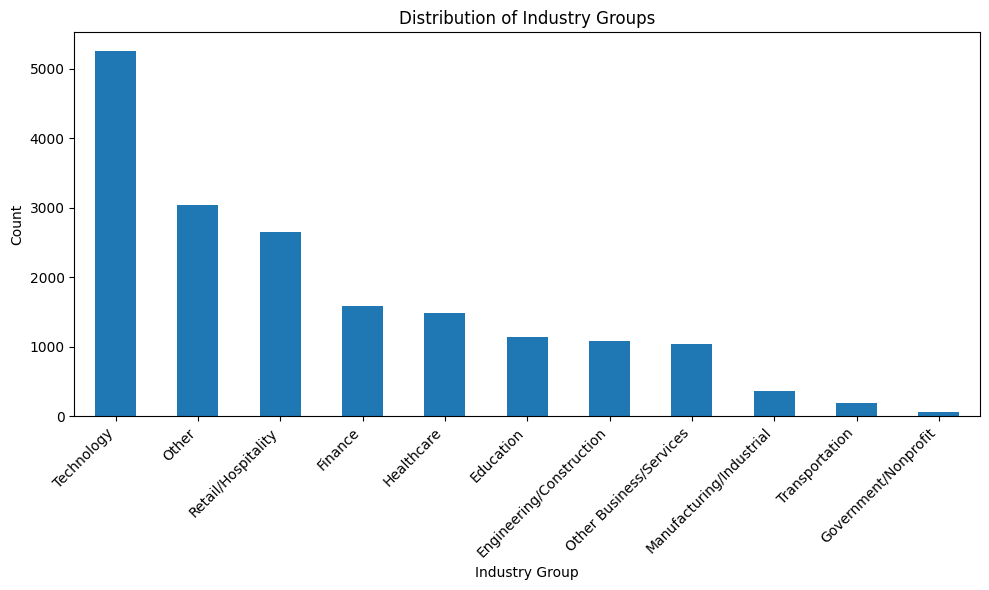

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
dist.plot(kind="bar")

plt.title("Distribution of Industry Groups")
plt.xlabel("Industry Group")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [148]:
X_train["employment_type"].nunique()
X_train["employment_type"].value_counts()

employment_type
full-time     8825
unknown       2012
contract      1968
part-time     1965
temporary     1589
internship    1376
other          154
Name: count, dtype: int64

In [149]:
# One-hot encode the industry column and employment_type column
X_train = pd.get_dummies(X_train, columns=['industry_group', 'employment_type'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['industry_group', 'employment_type'], drop_first=False)

# Ensure test has the same columns as train
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# checking result
X_train.filter(like='industry_group').head(10)


,industry_group_Education,industry_group_Engineering/Construction,industry_group_Finance,industry_group_Government/Nonprofit,industry_group_Healthcare,industry_group_Manufacturing/Industrial,industry_group_Other,industry_group_Other Business/Services,industry_group_Retail/Hospitality,industry_group_Technology,industry_group_Transportation
8343,False,False,True,False,False,False,False,False,False,False,False
10413,False,False,False,False,False,False,False,False,True,False,False
7954,False,False,True,False,False,False,False,False,False,False,False
14811,False,False,False,False,True,False,False,False,False,False,False
5201,False,False,False,False,False,False,False,False,False,True,False
13190,False,False,False,False,False,False,False,False,False,True,False
14118,False,False,False,False,False,False,True,False,False,False,False
9443,False,False,False,False,False,False,False,False,False,True,False
10199,False,False,False,False,False,False,True,False,False,False,False
13239,False,False,False,False,False,False,False,False,False,True,False


In [150]:
X_train.shape

(17889, 22)

In [151]:
X_test.shape

(7667, 22)

In [152]:
X_train.columns

Index(['location', 'salary_range', 'industry', 'text',
       'industry_group_Education', 'industry_group_Engineering/Construction',
       'industry_group_Finance', 'industry_group_Government/Nonprofit',
       'industry_group_Healthcare', 'industry_group_Manufacturing/Industrial',
       'industry_group_Other', 'industry_group_Other Business/Services',
       'industry_group_Retail/Hospitality', 'industry_group_Technology',
       'industry_group_Transportation', 'employment_type_contract',
       'employment_type_full-time', 'employment_type_internship',
       'employment_type_other', 'employment_type_part-time',
       'employment_type_temporary', 'employment_type_unknown'],
      dtype='object')

In [153]:
X_train.drop(columns = ["industry"], inplace = True)
X_test.drop(columns = ["industry"], inplace = True)

print(X_train.columns)
print(X_test.columns)

Index(['location', 'salary_range', 'text', 'industry_group_Education',
       'industry_group_Engineering/Construction', 'industry_group_Finance',
       'industry_group_Government/Nonprofit', 'industry_group_Healthcare',
       'industry_group_Manufacturing/Industrial', 'industry_group_Other',
       'industry_group_Other Business/Services',
       'industry_group_Retail/Hospitality', 'industry_group_Technology',
       'industry_group_Transportation', 'employment_type_contract',
       'employment_type_full-time', 'employment_type_internship',
       'employment_type_other', 'employment_type_part-time',
       'employment_type_temporary', 'employment_type_unknown'],
      dtype='object')
Index(['location', 'salary_range', 'text', 'industry_group_Education',
       'industry_group_Engineering/Construction', 'industry_group_Finance',
       'industry_group_Government/Nonprofit', 'industry_group_Healthcare',
       'industry_group_Manufacturing/Industrial', 'industry_group_Other',
     

In [154]:
X_train["salary_range"].head(10)

8343     $68357-$117042
10413           unknown
7954     $51428-$124721
14811           unknown
5201     $66069-$143385
13190           unknown
14118           unknown
9443     $62712-$106981
10199           unknown
13239           unknown
Name: salary_range, dtype: object

In [155]:
def clean_salary(salary):
    if salary == "unknown":
        return 0
    
    try: 
        lower, higher = salary.split('-')
        lower = lower.strip().replace("$", "")
        higher = higher.strip().replace("$", "")
        avg = 1/2 * (int(lower) + int(higher))
    except ValueError:
        return -1
    
    return avg 

X_train["salary_avg"] = X_train["salary_range"].apply(clean_salary)
X_test["salary_avg"] = X_test["salary_range"].apply(clean_salary)

In [156]:
print(X_train[X_train["salary_avg"] == -1])

                        location salary_range  \
21942                    unknown        2-jun   
18804        us, tn, spring hill       10-oct   
20026            us, ca, anaheim       11-dec   
19651         us, wv, charleston       10-nov   
20254        us, tn, spring hill       10-nov   
11705          in, dl, new delhi        3-apr   
20155            in, hr, gurgaon        2-apr   
22543             us, md, laurel       oct-20   
18812         us, md, germantown       oct-20   
18164             in, mh, mumbai        4-jun   
19638        us, tn, spring hill       10-nov   
19613      us, tx, new braunfels       10-nov   
19643      us, tx, new braunfels       10-oct   
19150          in, ap, hyderabad       jun-18   
21913  us, pa, robinson township       11-nov   
19553  us, pa, robinson township       11-nov   
23605              us, fl, doral       10-oct   
15038        us, ca, yorba linda        40000   
12108                    unknown       oct-15   
19633        us, tn,

In [157]:
df_fake["salary_range"].head(10)

0    $55016-$100476
1     $53438-$93138
2    $45584-$105229
3    $66188-$139621
4    $32183-$115012
5    $61975-$109632
6     $45072-$97862
7     $38362-$75264
8    $48317-$134017
9     $61374-$89783
Name: salary_range, dtype: object

In [158]:
df_rf["salary_range"].head(10)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6    20000-28000
7            NaN
8            NaN
9            NaN
Name: salary_range, dtype: object

In [159]:
print(len(X_train[X_train["salary_avg"] == -1]))

21


So where are the dates coming from in the salary range column?
- Looked at the RealAndFake.csv and saw for some rows, the salary_range column incorretly populated and the actual pay of $$/hr was elsewhere in the row. 
- The number of instances where this is the case is relatively low, thus I will be ignoring the discrepancy for now

In [160]:
X_train["salary_avg"] = X_train["salary_avg"].astype('float32')
X_test["salary_avg"] = X_test["salary_avg"].astype('float32')

X_train.drop(columns = ["salary_range"], inplace = True)
X_test.drop(columns =["salary_range"], inplace = True)

print(X_train["salary_avg"].dtype)

print(f"range: {X_train['salary_avg'].min()}, {X_train['salary_avg'].max()}")


float32
range: -1.0, 650000000.0


In [161]:
#ready to normalize 
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaler
X_train["salary_avg_norm"] = scaler.fit_transform(X_train[["salary_avg"]])
X_test["salary_avg_norm"] = scaler.fit_transform(X_test[["salary_avg"]])

#checking
X_train.head()


,location,text,industry_group_Education,industry_group_Engineering/Construction,industry_group_Finance,industry_group_Government/Nonprofit,industry_group_Healthcare,industry_group_Manufacturing/Industrial,industry_group_Other,industry_group_Other Business/Services,...,industry_group_Transportation,employment_type_contract,employment_type_full-time,employment_type_internship,employment_type_other,employment_type_part-time,employment_type_temporary,employment_type_unknown,salary_avg,salary_avg_norm
8343,lowehaven,"conservation officer, nature morales, gibson a...",False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,92699.5,1.426162e-04
10413,"us, ct, stamford",customer service technical specialist novitex ...,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,0.0,1.538462e-09
7954,christinemouth,minerals surveyor fox-young - established 1986...,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,88074.5,1.355008e-04
14811,"us, mi, buchanan","caregiver - buchanan/niles ""our mission to our...",False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,0.0,1.538462e-09
5201,davisfort,"scientist, water quality phillips ltd - establ...",False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,104727.0,1.611200e-04


In [162]:
#it worked, will drop salary_avg now
X_train.drop(columns = ["salary_avg"], inplace = True)
X_test.drop(columns =["salary_avg"], inplace = True)

last feature: location

In [163]:
df["location"].nunique()
df[["location", "fraudulent"]].head(50)

,location,fraudulent
0,west jeffrey,1
1,lake meredithberg,1
2,lake cathybury,1
3,south matthewstad,1
4,east rhondafurt,1
5,wrightton,1
6,bridgetbury,1
7,carltown,1
8,north lisastad,1
9,brittanyside,1


initial hypothesis is that fake location = fake job posting, maybe use API to determine how legit a location is 

In [164]:
real_jobs = df[df["fraudulent"] == 0]
real_jobs.head()

,location,salary_range,employment_type,industry,fraudulent,text
10000,"us, ny, new york",unknown,other,unknown,0,"marketing intern we're food52, and we've creat..."
10001,"nz, , auckland",unknown,full-time,marketing and advertising,0,customer service - cloud video production 90 s...
10002,"us, ia, wever",unknown,unknown,unknown,0,commissioning machinery assistant (cma) valor ...
10003,"us, dc, washington",unknown,full-time,computer software,0,account executive - washington dc our passion ...
10004,"us, fl, fort worth",unknown,full-time,hospital & health care,0,bill review manager spotsource solutions llc i...


In [170]:
import re
import pandas as pd

def score_location_simple(raw_loc):
    if pd.isna(raw_loc):
        return 1
    
    loc = str(raw_loc).strip().lower()
    if loc == "":
        return 1

    score = 1

    # --- 1. Has commas (structure like: "us, ca, anaheim") ---
    if "," in loc:
        score += 2

    # --- 2. Contains known country / region codes ---
    known_tokens = ["us", "uk", "ca", "nz", "au", "india", "in", "gb"]
    if any(tok in loc.split(",")[0].split() for tok in known_tokens):
        score += 1

    # --- 3. Two-letter state-like tokens ("ny", "ca", "tx") ---
    if re.search(r"\b[a-z]{2}\b", loc):
        score += 1

    # --- 4. Direction prefix ("north ___", "east ___") ---
    if loc.split()[0] in ["north", "south", "east", "west"]:
        score += 1

    # --- 5. Suspicious fake-looking long single-word cities ---
    if len(loc.split()) == 1 and len(loc) > 10:
        score -= 1

    # --- 6. Suspicious double-suffix fake cities ("-furt", "-bury", "-view") ---
    fake_suffixes = ["furt", "bury", "view", "mouth", "shire", "stad", "side"]
    if any(loc.endswith(sfx) for sfx in fake_suffixes):
        score -= 1

    # clamp the score between 1 and 5
    return max(1, min(score, 5))

In [171]:
#X_train["legitimacy_score"] = X_train["location"].apply(score_location)

In [179]:
# --------------------------------------------------------
# STEP 1 — Compute location features using original df
# --------------------------------------------------------

# Legitimacy score (simple version)
X_train["location_legitimacy"] = df.loc[X_train.index, "location"].apply(score_location_simple)
X_test["location_legitimacy"]  = df.loc[X_test.index,  "location"].apply(score_location_simple)

# Structural features
def fe_location(loc):
    loc = str(loc).lower()
    return pd.Series({
        "loc_len": len(loc),
        "loc_word_count": len(loc.split()),
        "has_us_prefix": int(loc.startswith("us,")),
        "has_state_code": int(bool(re.search(r"\b[a-z]{2}\b", loc))),
        "starts_with_direction": int(loc.split()[0] in ["north", "south", "east", "west"]),
        "contains_digits": int(any(char.isdigit() for char in loc)),
    })

loc_train = df.loc[X_train.index, "location"].apply(fe_location)
loc_test  = df.loc[X_test.index,  "location"].apply(fe_location)

# Attach features
X_train = pd.concat([X_train, loc_train], axis=1)
X_test  = pd.concat([X_test,  loc_test], axis=1)

# --------------------------------------------------------
# STEP 2 — BUILD PREVIEW WITH ASSOCIATED VALUES
# --------------------------------------------------------

preview = pd.concat(
    [
        df.loc[X_train.index, ["location"]],   # original locations
        X_train[[
            "location_legitimacy",
            "loc_len",
            "loc_word_count",
            "has_us_prefix",
            "has_state_code",
            "starts_with_direction",
            "contains_digits"
        ]]
    ],
    axis=1
)

# Look at a random sample of 10 rows
preview.sample(10, random_state=42)

,location,location_legitimacy,loc_len,loc_len,loc_len,loc_word_count,loc_word_count,loc_word_count,has_us_prefix,has_us_prefix,has_us_prefix,has_state_code,has_state_code,has_state_code,starts_with_direction,starts_with_direction,starts_with_direction,contains_digits,contains_digits,contains_digits
2404,deborahmouth,1,12,12,12,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4379,walshmouth,1,10,10,10,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
24646,"us, il, chicago",5,15,15,15,3,3,3,1,1,1,1,1,1,0,0,0,0,0,0
915,bridgetbury,1,11,11,11,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
13903,"gb, edh, hermiston gait",5,23,23,23,4,4,4,0,0,0,1,1,1,0,0,0,0,0,0
501,walshmouth,1,10,10,10,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9198,martinview,1,10,10,10,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11079,"us, il, chicago",5,15,15,15,3,3,3,1,1,1,1,1,1,0,0,0,0,0,0
5604,port john,1,9,9,9,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0
19354,"fi, ol, oulu",4,12,12,12,3,3,3,0,0,0,1,1,1,0,0,0,0,0,0


In [182]:
print(X_train.head())
print(X_test.head())
train_full = X_train.copy()
train_full["fraudulent"] = y_train

test_full = X_test.copy()
test_full["fraudulent"] = y_test

train_full.to_csv("data/train_engineered.csv", index=False)
test_full.to_csv("data/test_engineered.csv", index=False)

                                                    text  \
8343   conservation officer, nature morales, gibson a...   
10413  customer service technical specialist novitex ...   
7954   minerals surveyor fox-young - established 1986...   
14811  caregiver - buchanan/niles "our mission to our...   
5201   scientist, water quality phillips ltd - establ...   

       industry_group_Education  industry_group_Engineering/Construction  \
8343                      False                                    False   
10413                     False                                    False   
7954                      False                                    False   
14811                     False                                    False   
5201                      False                                    False   

       industry_group_Finance  industry_group_Government/Nonprofit  \
8343                     True                                False   
10413                   False             

thoughts: 
- find a way to determine if a location is legit (maybe look at APIs)
    - create a legitmacy score to feed into model
- use a Pipeline to make sure I don't miss any transformations 